In [1]:
import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.merfish()
adata

/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/scanpy/_utils/__init__.py:33: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/scanpy/readwrite.py:16: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to en

squidpy==1.6.5


/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 49.2M/49.2M [00:04<00:00, 12.3MB/s]


AnnData object with n_obs × n_vars = 73655 × 161
    obs: 'Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'batch'
    uns: 'Cell_class_colors'
    obsm: 'spatial', 'spatial3d'

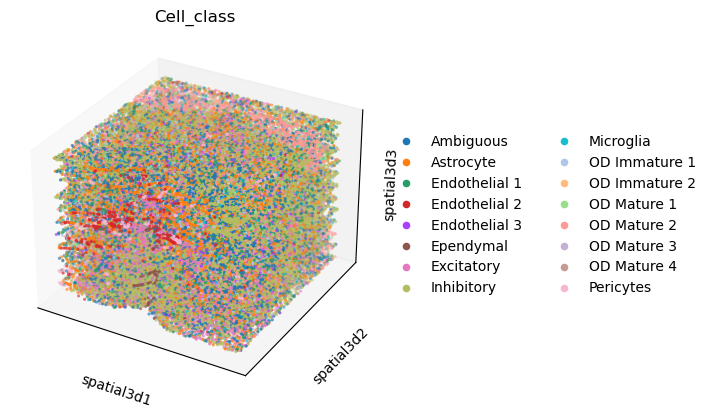

In [2]:
sc.pl.embedding(adata, basis="spatial3d", projection="3d", color="Cell_class")

/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


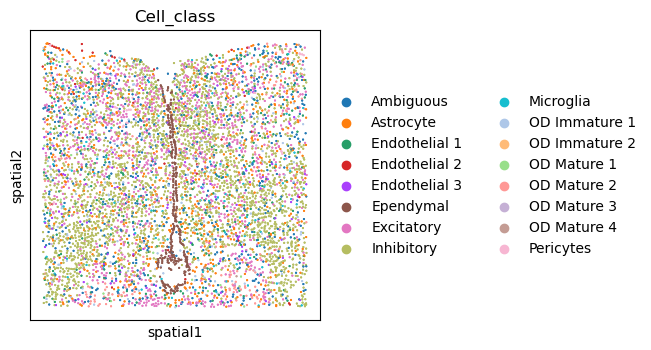

In [3]:
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == -9], shape=None, color="Cell_class", size=1
)

  0%|          | 0/1000 [00:00<?, ?/s]/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/scanpy/_utils/__init__.py:33: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from ann

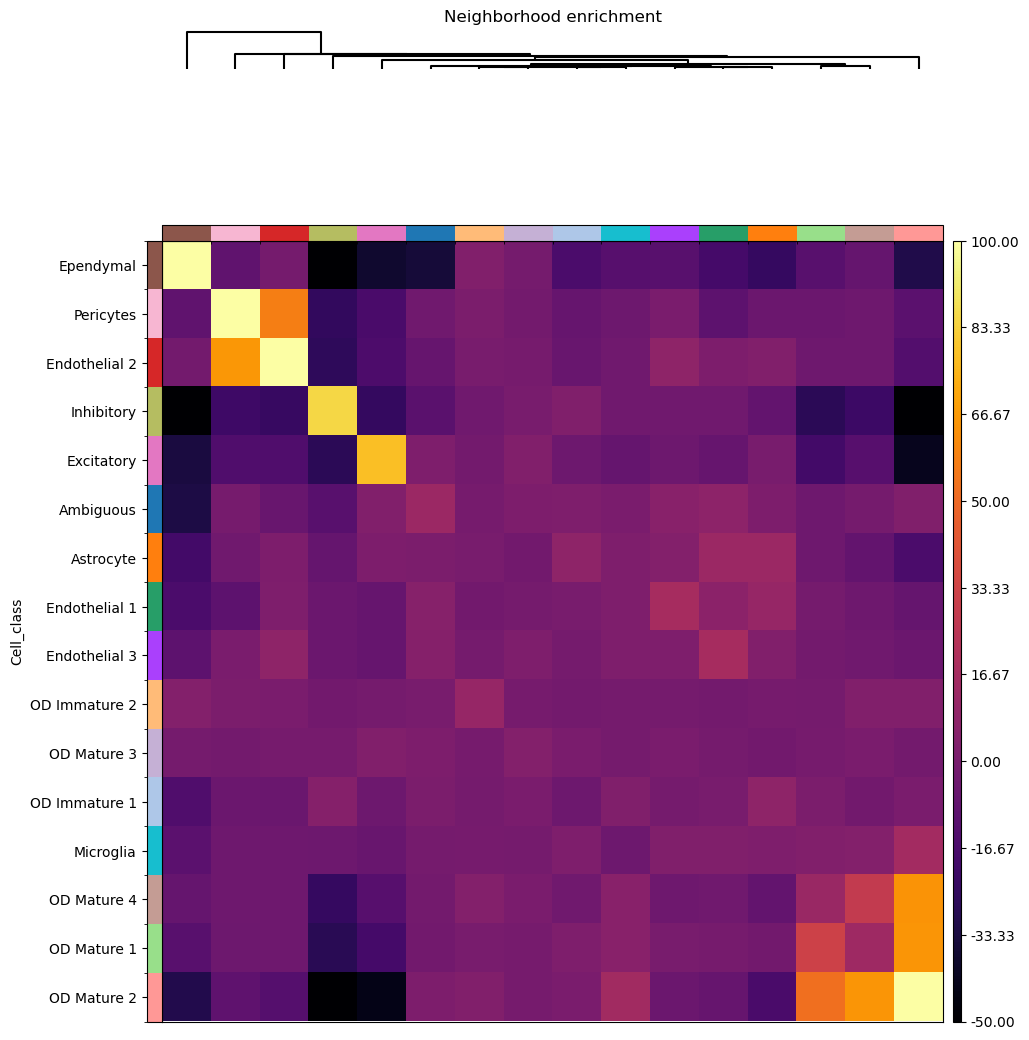

In [4]:
sq.gr.spatial_neighbors(adata, coord_type="generic", spatial_key="spatial3d")
sq.gr.nhood_enrichment(adata, cluster_key="Cell_class")
sq.pl.nhood_enrichment(
    adata, cluster_key="Cell_class", method="single", cmap="inferno", vmin=-50, vmax=100
)

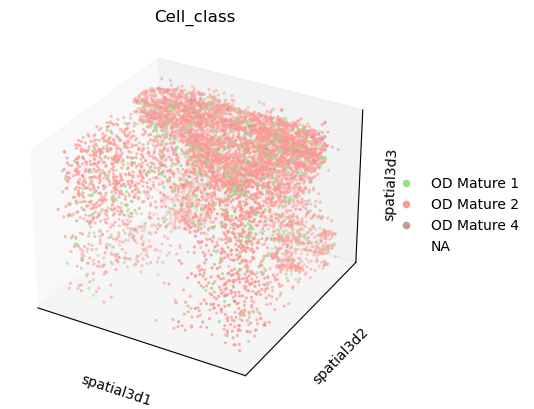

In [5]:
sc.pl.embedding(
    adata,
    basis="spatial3d",
    groups=["OD Mature 1", "OD Mature 2", "OD Mature 4"],
    na_color=(1, 1, 1, 0),
    projection="3d",
    color="Cell_class",
)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


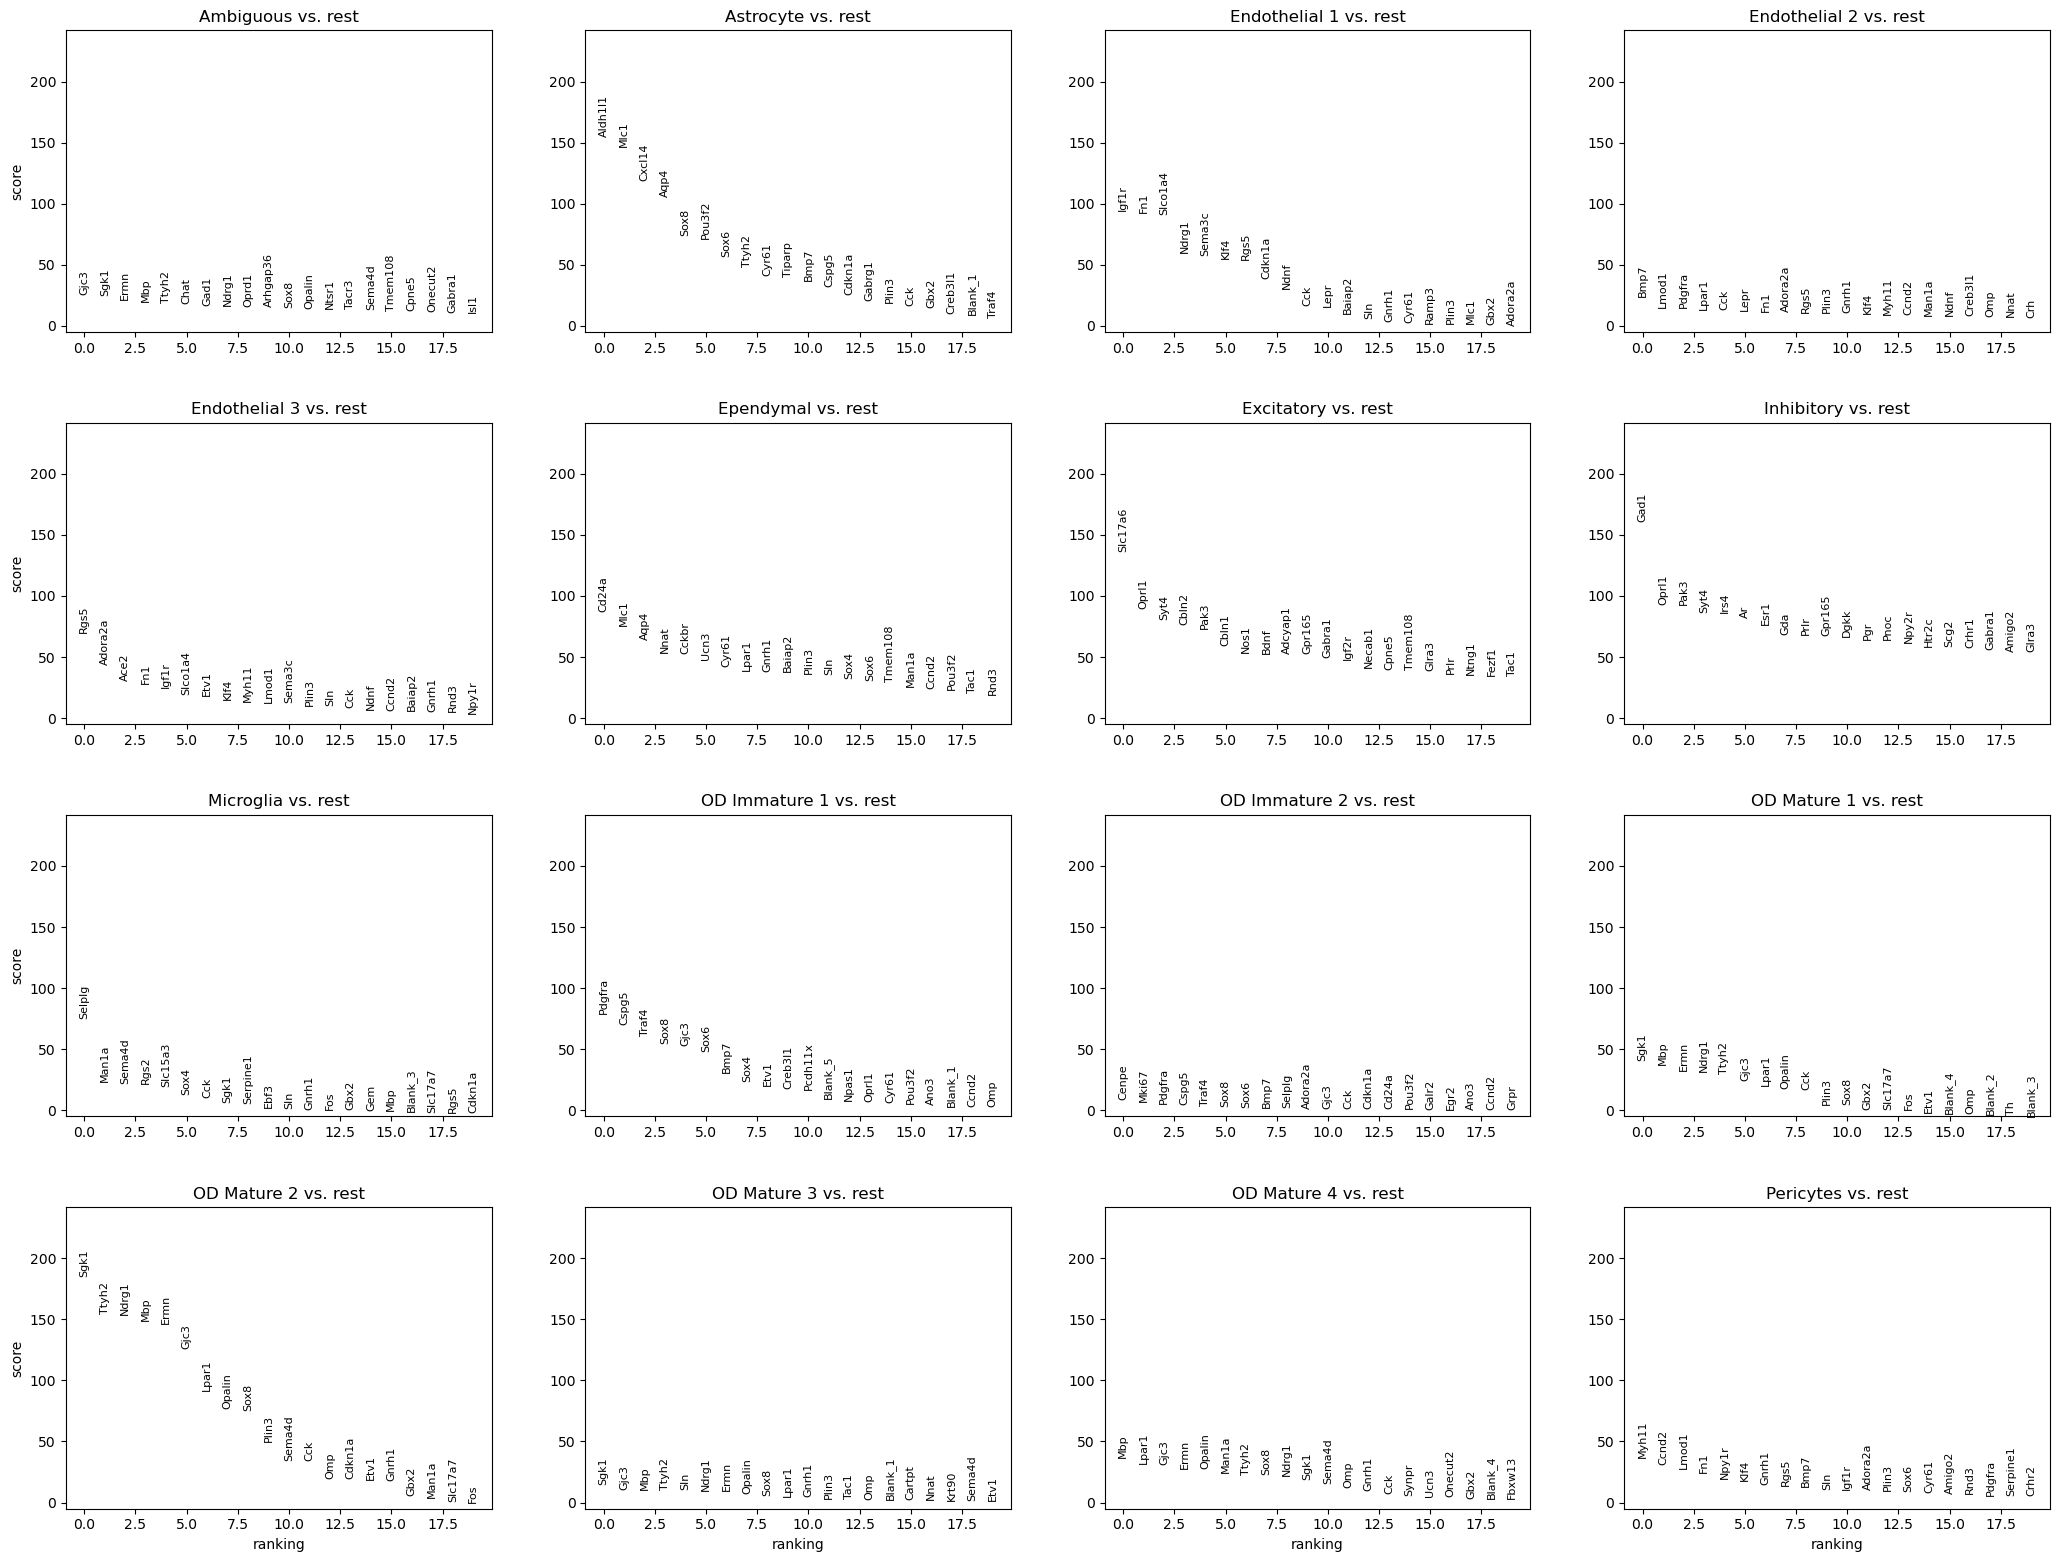

In [6]:
sc.tl.rank_genes_groups(adata, groupby="Cell_class")
sc.pl.rank_genes_groups(adata, groupby="Cell_class")

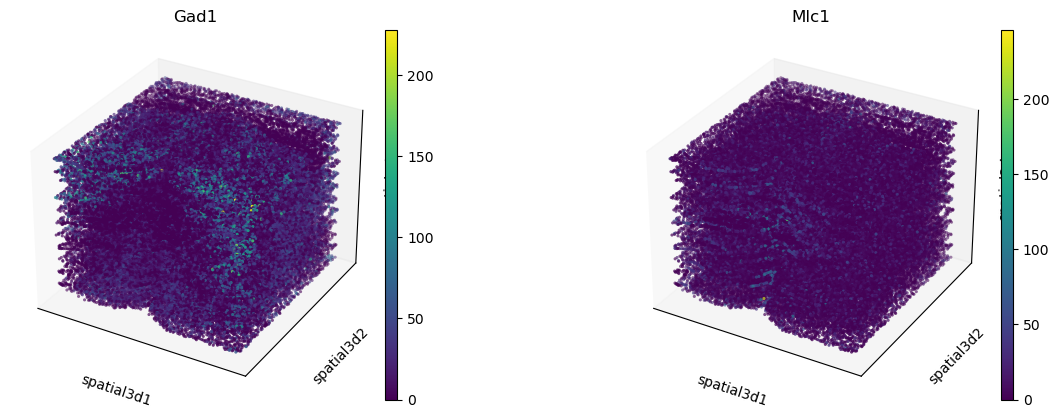

In [7]:
sc.pl.embedding(adata, basis="spatial3d", projection="3d", color=["Gad1", "Mlc1"])

  0%|          | 0/1000 [00:00<?, ?/s]/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/scanpy/_utils/__init__.py:33: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from ann

/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


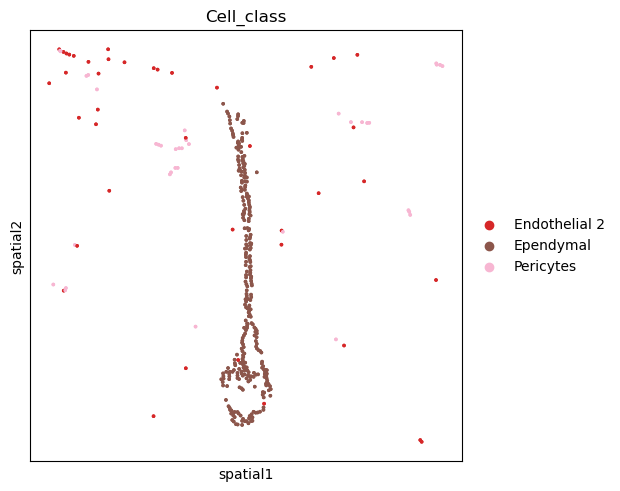

In [8]:
adata_slice = adata[adata.obs.Bregma == -9].copy()
sq.gr.spatial_neighbors(adata_slice, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="Cell_class")
sq.pl.spatial_scatter(
    adata_slice,
    color="Cell_class",
    shape=None,
    groups=[
        "Ependymal",
        "Pericytes",
        "Endothelial 2",
    ],
    size=10,
)

/opt/anaconda3/envs/spa_marker/lib/python3.12/site-packages/scanpy/metrics/_morans_i.py:105: UserWarning: 1 variables were constant, will return nan for these.
  return _MoransI(graph, vals)()


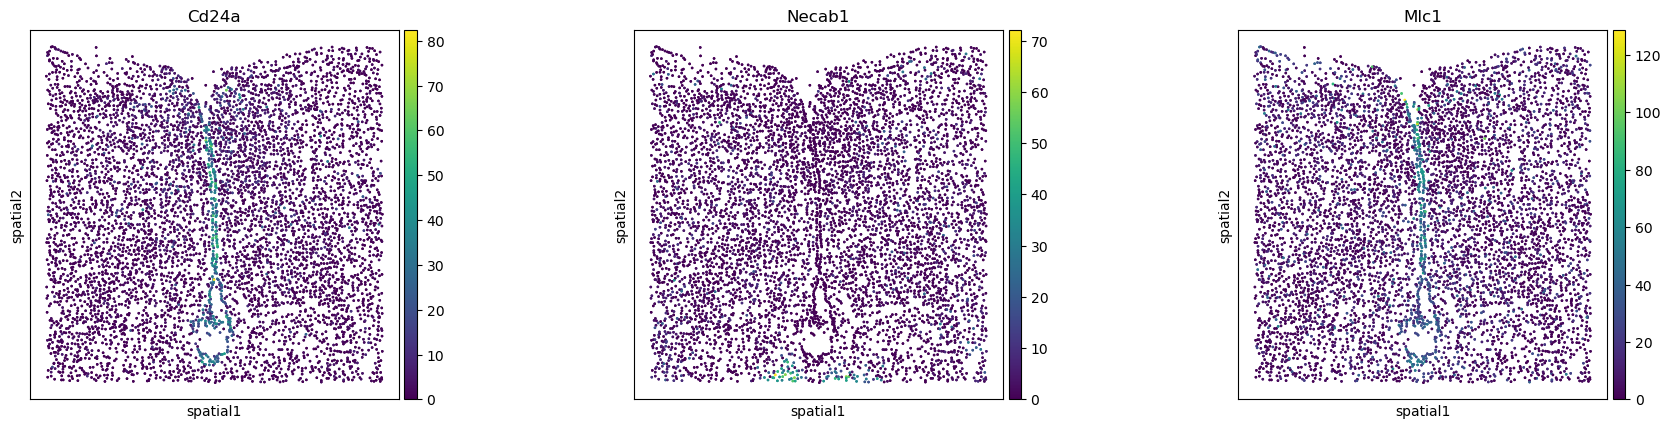

In [9]:
sq.gr.spatial_autocorr(adata_slice, mode="moran")
adata_slice.uns["moranI"].head()
sq.pl.spatial_scatter(
    adata_slice, shape=None, color=["Cd24a", "Necab1", "Mlc1"], size=3
)